In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle_json/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download -d trolukovich/food5k-image-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
food5k-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip food5k-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: evaluation/food/0.jpg   
  inflating: evaluation/food/1.jpg   
  inflating: evaluation/food/10.jpg  
  inflating: evaluation/food/100.jpg  
  inflating: evaluation/food/101.jpg  
  inflating: evaluation/food/102.jpg  
  inflating: evaluation/food/103.jpg  
  inflating: evaluation/food/104.jpg  
  inflating: evaluation/food/105.jpg  
  inflating: evaluation/food/106.jpg  
  inflating: evaluation/food/107.jpg  
  inflating: evaluation/food/108.jpg  
  inflating: evaluation/food/109.jpg  
  inflating: evaluation/food/11.jpg  
  inflating: evaluation/food/110.jpg  
  inflating: evaluation/food/111.jpg  
  inflating: evaluation/food/112.jpg  
  inflating: evaluation/food/113.jpg  
  inflating: evaluation/food/114.jpg  
  inflating: evaluation/food/115.jpg  
  inflating: evaluation/food/116.jpg  
  inflating: evaluation/food/117.jpg  
  inflating: evaluation/food/118.jpg  
  inflating: evaluation/food/119.jpg  
  inflating: eval

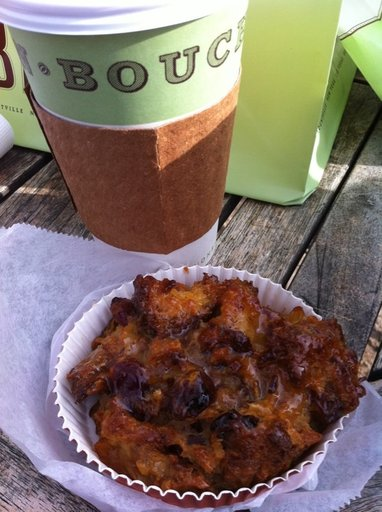

In [ ]:
from IPython.display import Image
Image("./training/food/100.jpg")

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
directory = "./training/"
categories = ["food","non_food"]

In [ ]:
size = 64
data = []
for categ in categories:
  folder = os.path.join(directory, categ)
  label = categories.index(categ)
  for img in os.listdir(folder):
    image_path = os.path.join(folder, img)
    image_array = cv2.imread(image_path)
    # if not os.path.isfile(image_path):
    #   continue
    # image_array = cv2.resize(image_array, (size, size))
    if type(image_array) is np.ndarray:
      if image_array.size == 0:
        continue
    if image_array is None:
        continue
    image_array = cv2.resize(image_array, (size, size))
    # plt.imshow(image_array)
    data.append([image_array, label])
    # break

In [ ]:
print(len(data))

3000


In [ ]:
print(data[1501][1])

1


In [ ]:
import random
random.shuffle(data)

In [ ]:
X_train = []
y_train = []

for feature, label in data:
  X_train.append(feature)
  y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
y_train = y_train.reshape(1, len(y_train))
print(X_train.shape)
print(y_train.shape)

(3000, 64, 64, 3)
(1, 3000)


# ***Generate X_validate and y_validate numpy arrays***

In [ ]:
directory_validate = "./validation/"
categories_validate = ["food", "non_food"]

data_validate = []
size = 64

for categ in categories_validate:
  label = categories_validate.index(categ)
  folder_categ = os.path.join(directory_validate, categ)
  for img in os.listdir(folder_categ):
    image_path = os.path.join(folder_categ, img)
    image_array = cv2.imread(image_path)
    image_array = cv2.resize(image_array, (size, size))
    data_validate.append([image_array, label])

print(len(data_validate))

1000


In [ ]:
random.shuffle(data_validate)

In [ ]:
X_validate = []
y_validate = []

for feature, label in data_validate:
  X_validate.append(feature)
  y_validate.append(label)

X_validate = np.array(X_validate)
y_validate = np.array(y_validate)
y_validate = y_validate.reshape(1, len(y_validate))

print(X_validate.shape)
print(y_validate.shape)


(1000, 64, 64, 3)
(1, 1000)


# ***Generate X_eval and y_eval numpy arrays***

In [ ]:
directory_eval = "./evaluation/"
categories_eval = ["food", "non_food"]

data_eval = []
size = 64

for categ in categories_eval:
  label = categories_eval.index(categ)
  folder_categ = os.path.join(directory_eval, categ)
  
  for img in os.listdir(folder_categ):
    image_path = os.path.join(folder_categ, img)
    image_array = cv2.imread(image_path)
    image_array = cv2.resize(image_array, (size, size))
    data_eval.append([image_array, label])

print(len(data_eval))

1000


In [ ]:
X_eval = []
y_eval = []

for feature, label in data_eval:
  X_eval.append(feature)
  y_eval.append(label)

X_eval = np.array(X_eval)
y_eval = np.array(y_eval)
y_eval = y_eval.reshape(1, len(y_eval))

print(X_eval.shape)
print(y_eval.shape)

(1000, 64, 64, 3)
(1, 1000)


# ***flatten data***

In [ ]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_validate_flatten = X_validate.reshape(X_validate.shape[0], -1).T
X_eval_flatten = X_eval.reshape(X_eval.shape[0], -1).T

print(X_train_flatten.shape)
print(X_validate_flatten.shape)
print(X_eval_flatten.shape)


(12288, 3000)
(12288, 1000)
(12288, 1000)


# ***Normalized data***

In [ ]:
X_train_norm = X_train_flatten/255
X_validate_norm = X_validate_flatten/255
X_eval_norm = X_eval_flatten/255

print(X_train_norm)
print(X_validate_norm)
print(X_eval_norm)

[[0.52156863 0.45882353 0.31372549 ... 0.05490196 0.79215686 0.4       ]
 [0.44313725 0.41960784 0.30588235 ... 0.11764706 0.9254902  0.43921569]
 [0.41176471 0.48627451 0.32941176 ... 0.09411765 0.99607843 0.43529412]
 ...
 [0.9254902  0.34117647 0.0745098  ... 0.60392157 0.09411765 0.20392157]
 [0.89019608 0.37647059 0.02352941 ... 0.63921569 0.22745098 0.4       ]
 [0.84705882 0.38823529 0.10588235 ... 0.73333333 0.39215686 0.29019608]]
[[0.40784314 0.21568627 0.05098039 ... 0.24705882 0.9254902  0.53333333]
 [0.54509804 0.29803922 0.40784314 ... 0.26666667 0.99215686 0.52941176]
 [0.69803922 0.50196078 0.3372549  ... 0.30196078 1.         0.56078431]
 ...
 [0.28627451 0.01568627 0.38039216 ... 0.36078431 0.52156863 0.49019608]
 [0.40392157 0.         0.60392157 ... 0.23921569 0.60784314 0.49411765]
 [0.49411765 0.01960784 0.62352941 ... 0.23529412 0.67843137 0.5372549 ]]
[[0.25490196 0.01176471 0.00392157 ... 0.09019608 0.09019608 0.82745098]
 [0.25490196 0.03529412 0.01568627 ... 

# ***Final dataset***

In [ ]:
m_train = X_train.shape[0]
m_eval = X_eval.shape[0]
m_validate = X_validate.shape[0]
print("Number of training examples = ", m_train)
print("Number of validating examples = ", m_validate)
print("Number of testing examples = ", m_eval)

print("Each image is of size = ", X_train.shape[1]," X ", X_train.shape[2], " X ", X_train.shape[3])
print("Therefore, number of features = 64*64*3 = 12288")

print("\nTrain data : ")
print("X_train shape = ", X_train_norm.shape)
print("y_train shape = ", y_train.shape)

print("\nValidating data : ")
print("X_validate shape : ", X_validate_norm.shape)
print("y_validate shape : ", y_validate.shape)

print("\nEval data : ")
print("X_eval shape : ", X_eval_norm.shape)
print("y_eval shape: ", y_eval.shape)

Number of training examples =  3000
Number of validating examples =  1000
Number of testing examples =  1000
Each image is of size =  64  X  64  X  3
Therefore, number of features = 64*64*3 = 12288

Train data : 
X_train shape =  (12288, 3000)
y_train shape =  (1, 3000)

Validating data : 
X_validate shape :  (12288, 1000)
y_validate shape :  (1, 1000)

Eval data : 
X_eval shape :  (12288, 1000)
y_eval shape:  (1, 1000)


# ***Initialize Parameters for L-layer Deep Neural Network***

In [ ]:
def initialize_parameters(layer_dim):
  
  np.random.seed(1)
  L = len(layer_dim)
  parameters = {}
  import math
  for l in range (1,L):
    parameters["W" + str(l)] = np.random.randn(layer_dim[l], layer_dim[l-1])* math.sqrt(2./layer_dim[l-1])
    parameters["b" + str(l)] = np.zeros((layer_dim[l],1))

  return parameters  

# ***sigmoid function***

In [ ]:
def sigmoid(Z):
  cache = Z
  A = 1/(1 + np.exp(-Z))
  return A, cache

# ***relu function***

In [ ]:
def relu(Z):
  
  cache = Z
  A = np.maximum(0,Z)
  return A, cache

# **forward propagation module**

# ***linear forward***

In [ ]:
def linear_forward(A, W, b):

  Z = W.dot(A) + b
  cache = (A,W,b)
  return Z, cache



# ***linear activation forward***

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):
  
  if (activation == "sigmoid"):
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = sigmoid(Z)
  
  elif (activation == "relu"):
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = relu(Z)
  
  cache = (linear_cache, activation_cache)
  return A, cache
  

# ***L-model forward***

In [ ]:
def L_model_forward(parameters, X):
  A = X
  caches = []
  L = len(parameters)//2
  for l in range(1,L):
    A_prev = A
    A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], activation = "relu")
    caches.append(cache)
  
  AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)],activation = "sigmoid")
  caches.append(cache)

  return AL, caches


# ***Cost Function***

In [ ]:
def compute_cost(AL, Y):
  m = Y.shape[1]

  # cost = -(1/m)*np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL)))
  cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))

  cost = np.squeeze(cost)
  return cost

# ***Backward Propagation Module***

### ***sigmoid backward function***

In [ ]:
def sigmoid_backward(dA, cache):
  
  Z = cache
  s = 1/(1+np.exp(-Z))
  dZ = dA * s * (1-s)
  return dZ

### ***relu backward function***

In [ ]:
def relu_backward(dA, cache):
  
  Z = cache
  dZ = np.array(dA, copy = True)

  dZ[Z<=0] = 0
  return dZ

# ***Linear backward***

In [ ]:
def linear_backward(dZ, cache):
  
  A_prev, W, b = cache
  m = A_prev.shape[1]

  dW = (1./m)*np.dot(dZ, A_prev.T)
  db = (1./m)*np.sum(dZ, axis = 1, keepdims = True)
  dA_prev = np.dot(W.T, dZ)

  return dA_prev, dW, db


# ***Linear activation backward***

In [ ]:
def linear_activation_backward(dA, cache, activation):
  
  linear_cache, activation_cache = cache
  if activation == "relu":
    dZ = relu_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
  
  elif activation == "sigmoid":
    dZ = sigmoid_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
  
  return dA_prev, dW, db


# ***L-model Backward***

In [ ]:
def L_model_backward(AL, Y, caches):
  
  grads = {}
  L = len(caches)
  m = AL.shape[1]
  Y = Y.reshape(AL.shape)

  dAL = -(np.divide(Y,AL) - np.divide(1-Y, 1-AL))

  current_cache = caches[L-1]

  grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")

  for l in reversed(range(L-1)):

    current_cache = caches[l]
    grads["dA" + str(l+1)], grads["dW" + str(l+1)], grads["db" + str(l+1)] = linear_activation_backward(grads["dA" + str(l+2)], current_cache, "relu")
    
  return grads


# ***updating parameters***

In [ ]:
def update_parameters(grads, params, learning_rate):

  
  L = len(params)//2

  for l in range(L):
    params["W" + str(l+1)] = params["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
    params["b" + str(l+1)] = params["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]
  
  return params

# ***L-layer model***

In [ ]:
layers_dims = [12288, 20,7, 5, 1]

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 2000, print_cost = False):

  np.random.seed(1)
  costs = []
  
  # initialize paramteters
  parameters = initialize_parameters(layers_dims)

  # Loop gradient descent
  for i in range(0, num_iterations):
    # forward propagation
    AL, caches = L_model_forward(parameters, X)

    #cost function
    cost = compute_cost(AL, Y)

    # backward propagation
    grads = L_model_backward(AL, Y, caches)

    # updating parameters

    parameters = update_parameters(grads, parameters, learning_rate)

    # printing cost to console
    if print_cost and i % 100 == 0 or i == num_iterations - 1:
      print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    if i % 100 == 0 or i == (num_iterations-1):
      costs.append(cost)
    

  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()

  return parameters, costs


In [ ]:
print(y_train.shape)

(1, 3000)


In [ ]:
# parameters, costs = L_layer_model(X_train_prefinal, y_train_prefinal, layers_dims, num_iterations=400, print_cost=True)

In [ ]:
X_train_red = X_train_norm[ : , 0:500]
print(X_train_red.shape)

(12288, 500)


In [ ]:
y_train_red = y_train[:, 0:500]
print(y_train_red.shape)

(1, 500)


Cost after iteration 0: 1.0113272992164206
Cost after iteration 100: 0.6113190296807978
Cost after iteration 200: 0.5447616058831041
Cost after iteration 300: 0.498339910523567
Cost after iteration 400: 0.46983432254674407
Cost after iteration 500: 0.42583635170532985
Cost after iteration 600: 0.41131819427649885
Cost after iteration 700: 0.3885316274304446
Cost after iteration 800: 0.3329951880816634
Cost after iteration 900: 0.3075385372765852
Cost after iteration 1000: 0.28546651761610603
Cost after iteration 1100: 0.26877307058429156
Cost after iteration 1200: 0.25470321927691575
Cost after iteration 1300: 0.24187333483561252
Cost after iteration 1400: 0.22796725201210366
Cost after iteration 1500: 0.215376864500349
Cost after iteration 1600: 0.20990034316652018
Cost after iteration 1700: 0.19180420483651187
Cost after iteration 1800: 0.18175911484751847
Cost after iteration 1900: 0.1682354310301076
Cost after iteration 2000: 0.15936961892383414
Cost after iteration 2100: 0.1573718

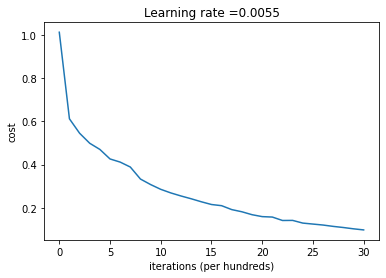

In [ ]:
parameters, costs = L_layer_model(X_train_red, y_train_red, layers_dims, learning_rate = 0.0055, num_iterations=3000, print_cost=True)

# ***Prediction***

In [ ]:
def predict(X, y, parameters):
    
    m = X.shape[1]
    n = len(parameters) // 
    p = np.zeros((1,m))
    
    probas, caches = L_model_forward(parameters, X)

    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
  
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [ ]:
pred_train = predict(X_train_red, y_train_red, parameters)

Accuracy: 0.9820000000000003


In [ ]:
pred_test = predict(X_validate_norm, y_validate, parameters)

Accuracy: 0.7550000000000002


In [ ]:
pred_test = predict(X_eval_norm, y_eval, parameters)

Accuracy: 0.7500000000000002
